# EDA -- Linear Regression
# Predecir el coste del seguro médico de una persona

La importante compañía de seguros 4Geeks Insurance S.L. quiere calcular, en función de datos los fisiológicos de sus clientes, cuál va a ser la prima (coste) que debe asumir cada uno de ellos. Para ello, ha reunido a un equipo completo de médicos y en función de datos de otras compañías y un estudio particular han logrado reunir un conjunto de datos para entrenar un modelo predictivo.

In [1]:
# Your code here

import pandas as pd

lr_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
lr_data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


age. Edad del beneficiario principal (numérico)
sex. Género del beneficiario principal (categórico)
bmi. índice de masa corporal (numérico)
children. Número de niños/dependientes cubiertos por un seguro médico (numérico)
smoker. ¿Es fumador? (categórico)
region. Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico)
charges. Prima del seguro médico (numérico)

In [2]:
#veo las dimensiones
lr_data.shape

(1338, 7)

In [3]:
#m eijo tipo de datos y valores

lr_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Hay un total de 1338 lineas, que en este caso, representan personas. Hay 7 columnas, incluida la target a predecir, esta es, el coste de seguro medico de una persona.
No hay datos o valores nulos
Hay 4 caracteristicas numericas y 3 categoricas


No puedo eliminar duplicados, no hay registro unico que se pueda repetir
No hay datos irrelevantes, nos han compartido las variables a considerar en su totalidad



In [4]:
#drop region
lr_data.drop(["region"], axis = 1, inplace=True)
lr_data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/bh/27_cs0d96p3btcd4dc4g7h440000gn/T/ipykernel_5116/3959959693.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  lala.set_xticklabels(lala.get_xticklabels(), rotation=90)
/var/folders/bh/27_cs0d96p3btcd4dc4g7h440000gn/T/ipykernel_5116/3959959693.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a 

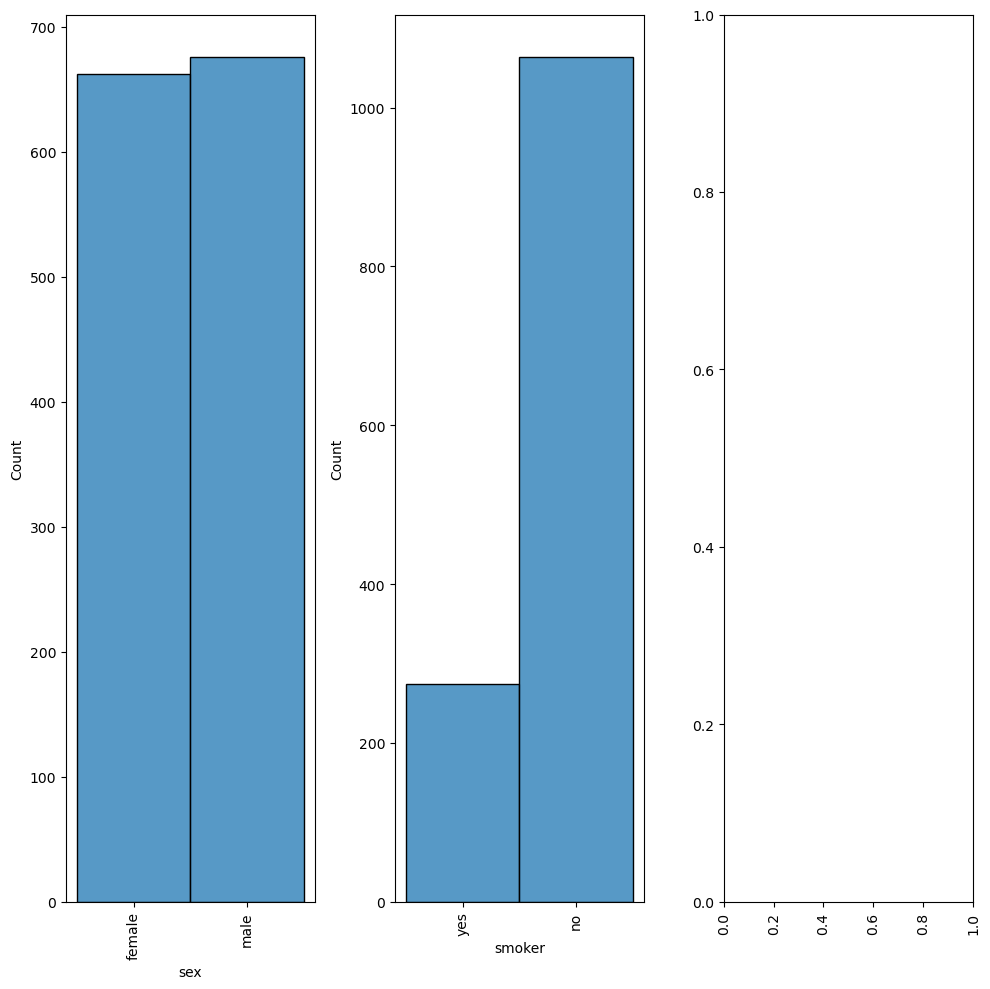

In [5]:
#ANALISIS DE VARIABLES CATEGORICAS

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (10, 10))

#CREO LOS HIST

sns.histplot(ax = axis[0], data = lr_data, x = "sex")
sns.histplot(ax = axis[1], data= lr_data, x= "smoker")


for lala in axis:
    lala.set_xticklabels(lala.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()


De los histogramas podemos ver:
1 - la poblacion se distribuye casi 50/50 entre mujeres y hombres
2- Casi el 80% de la poblacion es no fumadora
3- La division por region es casi identica, con excepcion de southwest que tiene, minimamente, mas gente en la region.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

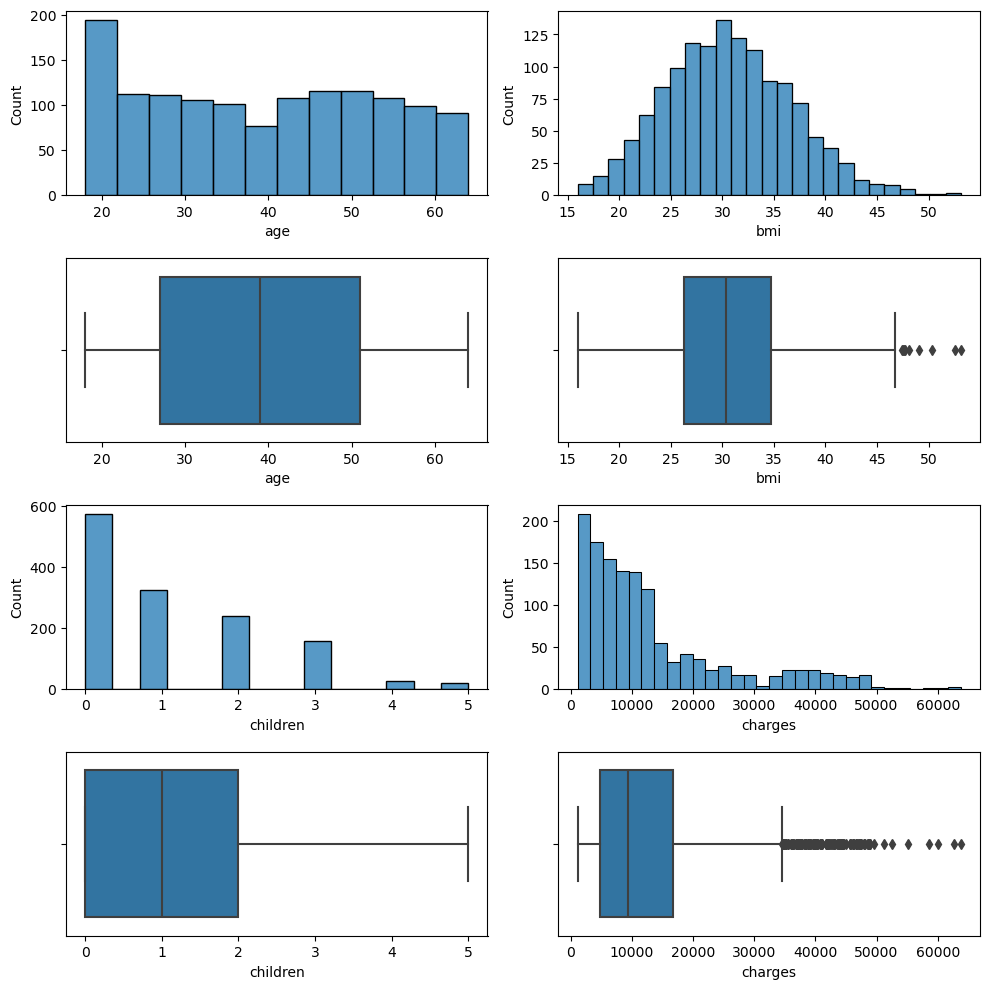

In [6]:
#ANALISIS DE LAS VARIABLES NUMERICAS
#CREO BOXPLOTS E HISTOGRAMAS 
# age	bmi	children	charges


fig, axis = plt.subplots(4, 2, figsize = (10, 10))

sns.histplot(ax = axis[0, 0], data = lr_data, x = "age")
sns.boxplot(ax = axis[1, 0], data = lr_data, x = "age")
sns.histplot(ax = axis[0, 1], data = lr_data, x = "bmi")
sns.boxplot(ax = axis[1, 1], data = lr_data, x = "bmi")
sns.histplot(ax = axis[2, 0], data = lr_data, x = "children")
sns.boxplot(ax = axis[3, 0], data = lr_data, x = "children")
sns.histplot(ax = axis[2, 1], data = lr_data, x = "charges")
sns.boxplot(ax = axis[3, 1], data = lr_data, x = "charges")

plt.tight_layout()
plt.show()


Analisis variables numericas en base a los graficos y del describe podemos ver
1- Las edades de los asegurados van desde los 18 hastta los 64 anos. El 50% de los asegurados tienen entre casi 30 y poco mas de 50 anos. Un 25% de los asegurados tiene +50 hasta 64, y 25% tiene 18 a casi 30.
2- Mirando el BMI, vemos que la distribucion de estos datos es normal, teniendo alguos outliers con un BMI de mas de 45
3- El 75% de los asegurados tiene hasta 2 hijos
4- El 50% de los asegurados paga entre 4700 y 16000 euros de prima de seguro. Un 25% de los asegurados paga de 16k. a 35k y vemos outliers, gente que paga mas de 35K de prima


In [7]:
lr_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


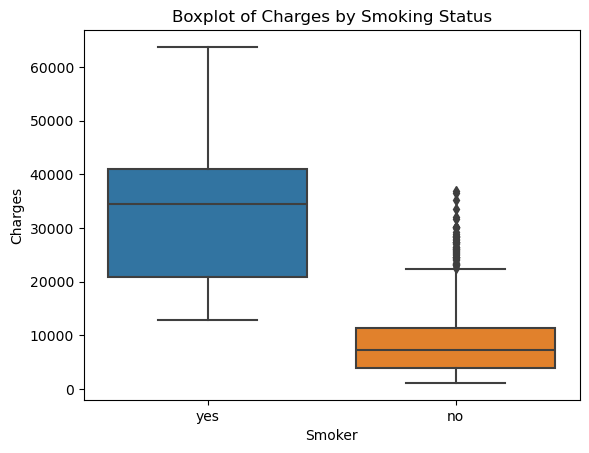

In [8]:
#NO ME QUEDA CLARA ESTA RELACION NEGATIVA ENTRE PRIMA Y FUMADORES, ASI QUE PONGO ESTOS BOXPLOTS PARA VER QUE DA

sns.boxplot(data=lr_data, x='smoker', y='charges')
plt.title('Boxplot of Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

In [9]:
grupo_fuman = lr_data[lr_data["smoker"] == "yes"]
grupo_nofuman = lr_data[lr_data["smoker"] == "no"]

gf_stats = grupo_fuman["charges"].describe()
gnf_stats = grupo_nofuman["charges"].describe()

print("Stats fumadores")
print(gf_stats)

print("Stats no fumadores")
print(gnf_stats)

Stats fumadores
count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: charges, dtype: float64
Stats no fumadores
count     1064.000000
mean      8434.268298
std       5993.781819
min       1121.873900
25%       3986.438700
50%       7345.405300
75%      11362.887050
max      36910.608030
Name: charges, dtype: float64


Vemos que en el caso de los fumadores, el promedio de la prima es 3 veces mas alto que el de los no fumadores. El valor del desvio esta del doble en el caso de fuamdores, lo que implica una mayor divergencia de datos.

In [10]:
# FACTORIZACION DE LOS DATOS

from sklearn.preprocessing import MinMaxScaler

lr_data["sex_n"] = pd.factorize(lr_data["sex"])[0]
lr_data["smoker_n"] = pd.factorize(lr_data["smoker"])[0]





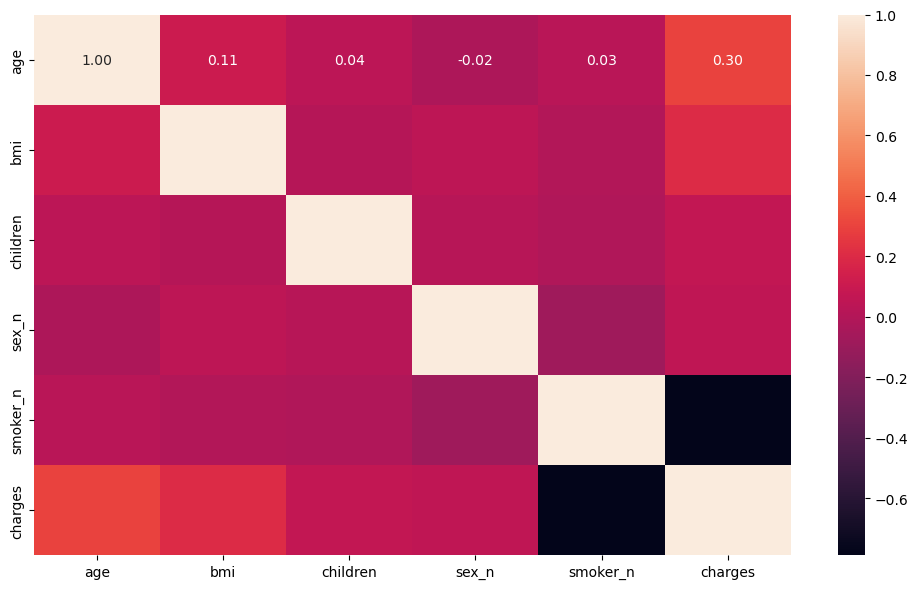

In [11]:
# HEATMAP

fig, axis = plt.subplots(figsize = (10, 6))
sns.heatmap(lr_data[["age", "bmi", "children", "sex_n", "smoker_n", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Podmeos ver alguna relacion enre la edad, el bmi y el valor de la prima, pero no son correlaciones particularmente fuertes.


In [12]:
lr_data.describe()


,age,bmi,children,charges,sex_n,smoker_n
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.795217
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000


TypeError: can't multiply sequence by non-int of type 'float'

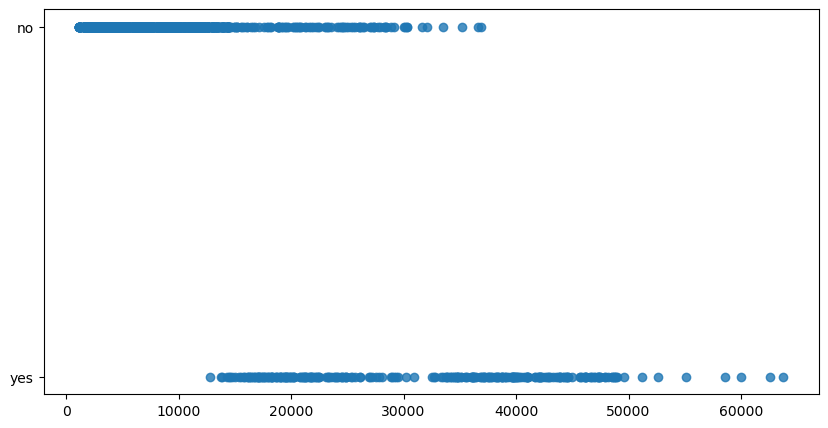

In [13]:
#grafico como en el ejempplo titanic

fig, ax = plt.subplots(figsize = (10, 5))
sns.regplot(ax = ax, data= lr_data, x = "charges", y = "smoker")

plt.tight_layout()
plt.show()

In [14]:
#  MIRO LOS OUTLIERS DE MI DATA SET
#CHarges


charges_stats = lr_data["charges"].describe()
charges_stats

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [15]:
#CALCULO IQR

charg_iqr = charges_stats["75%"] - charges_stats["25%"]
upper_limit = charges_stats["75%"] + 1.5 * charg_iqr
lower_limit = charges_stats["25%"] - 1.5 * charg_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(charg_iqr, 2)}")

The upper and lower limits for finding outliers are 34489.35 and -13109.15, with an interquartile range of 11899.63


In [16]:
#VEO SI SON MUCHOS los outliers

lr_data[lr_data["charges"] > 35000]

,age,sex,bmi,children,smoker,charges,sex_n,smoker_n
14,27,male,42.130,0,yes,39611.75770,1,0
19,30,male,35.300,0,yes,36837.46700,1,0
23,34,female,31.920,1,yes,37701.87680,0,0
29,31,male,36.300,2,yes,38711.00000,1,0
30,22,male,35.600,0,yes,35585.57600,1,0
...,...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,62592.87309,1,0
1301,62,male,30.875,3,yes,46718.16325,1,0
1303,43,male,27.800,0,yes,37829.72420,1,0
1313,19,female,34.700,2,yes,36397.57600,0,0


In [17]:
#veo cuantos son fumadores
fumador_35k = lr_data[(lr_data['smoker'] == "yes") & (lr_data["charges"] > 35000)]
print(fumador_35k)

      age     sex     bmi  children smoker      charges  sex_n  smoker_n
14     27    male  42.130         0    yes  39611.75770      1         0
19     30    male  35.300         0    yes  36837.46700      1         0
23     34  female  31.920         1    yes  37701.87680      0         0
29     31    male  36.300         2    yes  38711.00000      1         0
30     22    male  35.600         0    yes  35585.57600      1         0
...   ...     ...     ...       ...    ...          ...    ...       ...
1300   45    male  30.360         0    yes  62592.87309      1         0
1301   62    male  30.875         3    yes  46718.16325      1         0
1303   43    male  27.800         0    yes  37829.72420      1         0
1313   19  female  34.700         2    yes  36397.57600      0         0
1323   42  female  40.370         2    yes  43896.37630      0         0

[130 rows x 8 columns]


Estos outliers representan el 10% de mi dataset pero entiendo que no los puedo dropear porque casi 100% de mis outliers son fumadores y pagan mas,


Vamos a hacer la division en train y test groups

In [18]:
# We divide the dataset into training and test samples
# creo el grupo de variables que debe contener mi X

from sklearn.model_selection import train_test_split

num_variables = ["age", "bmi", "children", "sex_n", "smoker_n"]

X = lr_data.drop("charges", axis = 1)[num_variables]
y = lr_data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,bmi,children,sex_n,smoker_n
560,46,19.95,2,0,1
1285,47,24.32,0,0,1
1142,52,24.86,0,0,1
969,39,34.32,5,0,1
486,54,21.47,3,0,1


In [19]:
#AHORA HAGO EL SCALING DE LOS DTOS 
# Only predictor variables should be scaled, never the target.

from sklearn.preprocessing import MinMaxScaler

num_variables = ["age", "bmi", "children", "sex_n", "smoker_n"]

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, index = X_train.index, columns= num_variables)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, index= X_test.index, columns= num_variables)

X_train_scaled.head()

,age,bmi,children,sex_n,smoker_n
560,0.608696,0.107345,0.4,0.0,1.0
1285,0.630435,0.224913,0.0,0.0,1.0
1142,0.739130,0.239440,0.0,0.0,1.0
969,0.456522,0.493947,1.0,0.0,1.0
486,0.782609,0.148238,0.6,0.0,1.0


In [20]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 4)
selection_model.fit(X_train_scaled, y_train)

ix = selection_model.get_support()
X_train_selection = pd.DataFrame(selection_model.transform(X_train_scaled), columns= X_train_scaled.columns.values[ix])
X_test_selection = pd.DataFrame(selection_model.transform(X_test_scaled), columns= X_test_scaled.columns.values[ix])

X_train_selection.head()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,bmi,children,sex_n,smoker_n
0,0.107345,0.4,0.0,1.0
1,0.224913,0.0,0.0,1.0
2,0.239440,0.0,0.0,1.0
3,0.493947,1.0,0.0,1.0
4,0.148238,0.6,0.0,1.0


In [21]:
X_test_selection.head()

,bmi,children,sex_n,smoker_n
0,0.247915,0.4,0.0,1.0
1,0.378262,0.0,0.0,1.0
2,0.293920,0.0,0.0,0.0
3,0.263250,0.6,1.0,1.0
4,0.429379,0.0,1.0,0.0


In [22]:
#GUARDO LOS SETS DE DATOS y asigno columna CHARGE a los X sets

X_train_selection["charges"] = list(y_train)
X_test_selection["charges"] = list(y_test)

X_train_selection.to_csv("../data/processed/clean_train_linear.csv", index=False)
X_test_selection.to_csv("../data/processed/clean_test_linear.csv", index=False)

In [23]:
# Aplicando el modelo de REGRESION LINEAL

train_set = pd.read_csv("../data/processed/clean_train_linear.csv")
test_set = pd.read_csv("../data/processed/clean_test_linear.csv")

train_set.head()

,bmi,children,sex_n,smoker_n,charges
0,0.107345,0.4,0.0,1.0,9193.83850
1,0.224913,0.0,0.0,1.0,8534.67180
2,0.239440,0.0,0.0,1.0,27117.99378
3,0.493947,1.0,0.0,1.0,8596.82780
4,0.148238,0.6,0.0,1.0,12475.35130


In [24]:
#quito CHARGES de los set de datos de test y train para aplicar el modelo

X_train = train_set.drop(["charges"], axis = 1)
y_train = train_set["charges"]

X_test = test_set.drop(["charges"], axis = 1)
y_test = test_set["charges"]

In [25]:
#busco el modelo

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [26]:

# After the training process, we can know the parameters (variables
# that the model has fitted:

print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): 25302.58002803105
Coefficients (b1, b2): [ 14811.92039759   3065.38454536    -63.32401216 -23188.98720457]


In [27]:
# Prediction

y_pred = model.predict(X_test)
y_pred

array([ 7011.84366781,  7716.3800387 , 29656.09712095,  7788.73658696,
       31599.17663857, 13398.70045568,  4725.70307922, 10795.15966751,
        2643.58620869,  8962.29336853, 30441.7530373 ,  9106.34986692,
        8158.10570292, 37594.6712815 , 35185.59804234, 35622.73915166,
       13987.43329815, 34152.47142778,  7544.42915161, 29656.09712095,
        8279.67401734,  9907.31731377,  7804.48270803, 11615.61708714,
        8798.47735845,  8776.36680915,  9740.7156755 ,  9707.03744741,
        7579.69372341,  7700.87497859,  9881.77396269,  8435.65677579,
        9649.06268407,  5542.80370636,  8258.16311027, 11552.29307498,
        6886.91856092,  8281.63799572, 29171.3305892 , 33519.30490368,
       10215.9069848 ,  8796.12632084, 10632.73647153,  5835.93584863,
       11162.56480509,  7261.93494255, 10381.08733102,  7276.24071818,
       35052.29699749, 12214.5817502 , 10218.905196  ,  8007.11361201,
       12872.25739255,  6100.93254124,  9410.40251439,  9712.05659289,
      

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")


Mean squared error: 47484296.29331464
Coefficient of determination: 0.6941405199447263


Si observamos el r2 es de 69% o sea que el 69% de los datos estan explicados por este modelo

ste tipo de modelos no se pueden optimizar, debido a la ausencia de hiperparámetros.

In [29]:
from pickle import dump

dump(model, open("../models/linear_regression.pkl", "wb"))